<a href="https://colab.research.google.com/github/Dipu1764/ML-2/blob/main/ML_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

X = np.array([[1, 2], [2, 3], [3, 1], [5, 2], [7, 8], [8, 7], [9, 9], [6, 6]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])


df = pd.DataFrame(X, columns=['cloudiness', 'windiness'])
df['rain'] = y
df

,cloudiness,windiness,rain
0,1,2,0
1,2,3,0
2,3,1,0
3,5,2,0
4,7,8,1
5,8,7,1
6,9,9,1
7,6,6,1


In [ ]:
model = LogisticRegression()

# Train the model
model.fit(X, y)

# Now, let's predict if it will rain with new data
# Example: Cloudiness = 4, Windiness = 6
new_data = np.array([[5, 5]])
prediction = model.predict(new_data)

# The prediction result: 0 for no rain, 1 for rain
prediction[0]

1

In [ ]:
weights = model.coef_[0]
bios = model.intercept_[0]

print('weights', weights)
print('bios', bios)

cloudiness , windiness = 4, 6

Z = bios + weights[0]*cloudiness + weights[1]*windiness


probability_of_rain = 1 / (1 + np.exp(-Z))

print("Probability of raining:", probability_of_rain)

weights [0.53298223 0.82509307]
bios -6.404848430627816
Probability of raining: 0.6632115264942609


# **project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

0

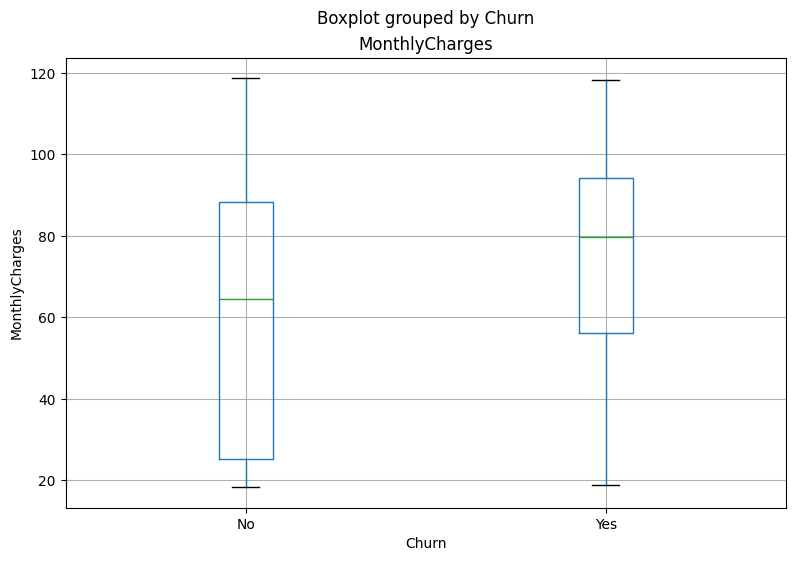

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

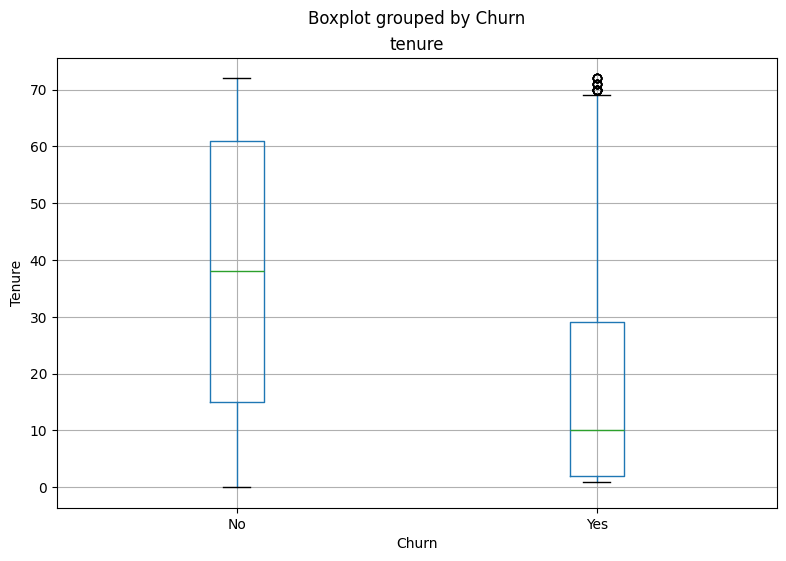

In [8]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

In [16]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
X = df[['tenure' , 'MonthlyCharges']].copy()
y = df['class'].copy()

In [17]:
df.shape

(7043, 22)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [19]:
y_train.value_counts()

,count
class,
0,4133
1,1501


In [20]:
y_test.value_counts()

,count
class,
0,1041
1,368


In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [23]:
print(clf.coef_)
print(clf.intercept_)

[[-0.05646759  0.03315394]]
[-1.77408798]


In [25]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)


In [26]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

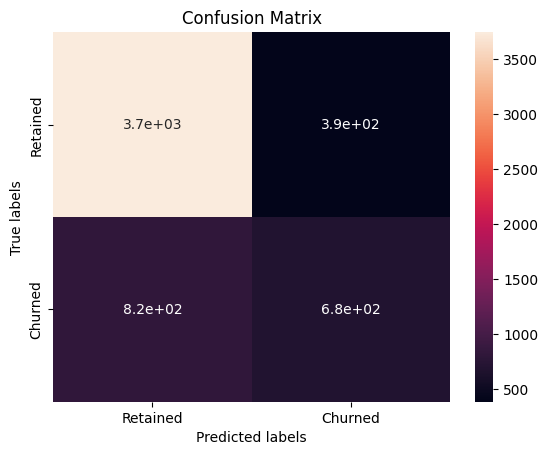

In [29]:
from sklearn.metrics import confusion_matrix

labels = ['Retained', 'Churned']

train_conf = confusion_matrix(y_train, train_class_preds)
print(train_conf)

ax = plt.subplot()
sns.heatmap(train_conf, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

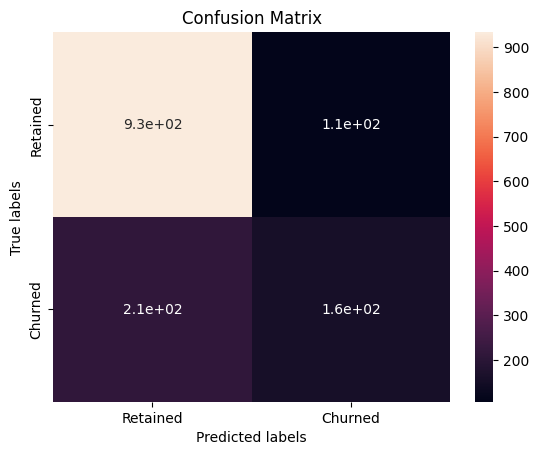

In [31]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Decision Tree:**

In [32]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [36]:
df = pd.read_csv('/Fruit Classification.csv')
df.head()

,Unnamed: 0,Color,Size,Fruit
0,0,Red,Large,Apple
1,1,Green,Large,Banana
2,2,Red,Medium,Banana
3,3,Red,Large,Apple
4,4,Red,Large,Apple


In [37]:
df = df.drop('Unnamed: 0', axis=1)
df

,Color,Size,Fruit
0,Red,Large,Apple
1,Green,Large,Banana
2,Red,Medium,Banana
3,Red,Large,Apple
4,Red,Large,Apple
...,...,...,...
95,Green,Large,Apple
96,Green,Medium,Apple
97,Green,Large,Apple
98,Yellow,Small,Banana


In [39]:
df['Color'] = df['Color'].map({'green' : 0 , 'Yellow': 1 , 'Red' : 2})
df['Size'] = df['Size'].map({'Small' : 0 , 'Medium': 1 , 'Large' : 2})
df['Fruit'] = df['Fruit'].map({'Apple' : 0 , 'Orange': 1 , 'Banana' : 2})

In [41]:
X = df[['Color', 'Size']]
y = df['Fruit']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(70, 2)
(30, 2)


In [44]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
prediction = model.predict([[2 , 0]])
prediction =  'Apple' if prediction == 0 else 'Banana'
print(prediction)

Apple


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
test_prediction = model.predict(X_test)
test_prediction

array([0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 2])

In [48]:
from sklearn.metrics import accuracy_score # import the accuracy_score function

print('Accuracy:' , accuracy_score (y_test, test_prediction)*100)


Accuracy: 63.33333333333333


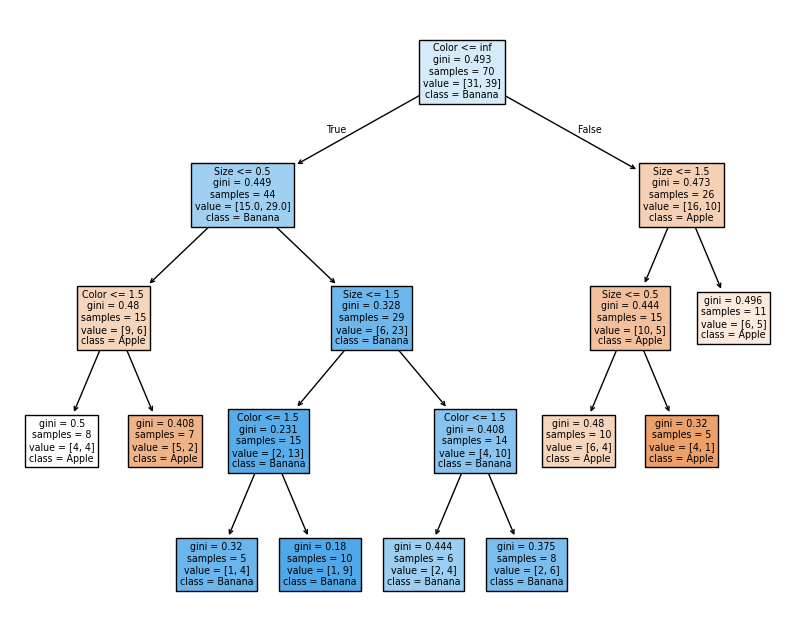

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=['Color', 'Size'], class_names=['Apple', 'Banana'])
plt.show()
